✅ Dataset Loaded Successfully!
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      196             78             10      110  23.7   
1            3       97            106             35      102  42.1   
2           10      180             84             23       92  43.2   
3            7      197             52             47      134  23.6   
4            4      103             97             46      179  42.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     1.658   48        0  
1                     0.888   31        0  
2                     1.613   75        1  
3                     1.564   54        1  
4                     1.452   28        0  

📌 2-WAY SPLIT RESULTS
Accuracy:  0.817
Precision: 0.886
Recall:    0.816
F1 Score:  0.849

📌 3-WAY SPLIT RESULTS
Validation Accuracy: 0.867
Test Accuracy:       0.756


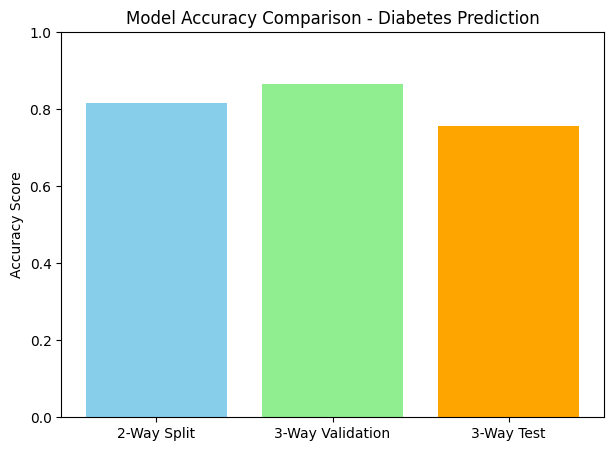

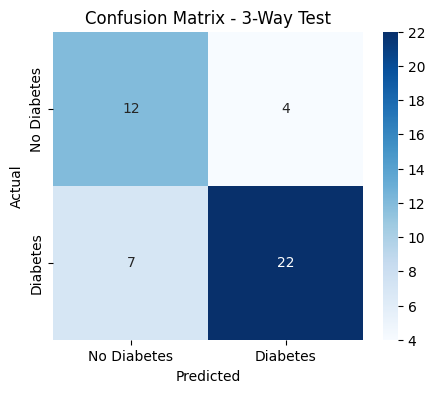


🤖 NEW USER DIABETES PREDICTION
Result: ⚠️ Likely to have Diabetes


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("diabetes_dataset.csv")
print("✅ Dataset Loaded Successfully!")
print(df.head())

# Feature + Target Split
X = df.drop(columns=["Outcome"]).values
y = df["Outcome"].values

scaler = StandardScaler()
model = LogisticRegression(max_iter=2000)

# -------------------- 2-WAY TRAIN/TEST SPLIT --------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc_2 = accuracy_score(y_test, y_pred)
prec_2 = precision_score(y_test, y_pred, zero_division=0)
rec_2 = recall_score(y_test, y_pred, zero_division=0)
f1_2 = f1_score(y_test, y_pred, zero_division=0)

print("\n📌 2-WAY SPLIT RESULTS")
print(f"Accuracy:  {acc_2:.3f}")
print(f"Precision: {prec_2:.3f}")
print(f"Recall:    {rec_2:.3f}")
print(f"F1 Score:  {f1_2:.3f}")


# -------------------- 3-WAY TRAIN/VAL/TEST SPLIT --------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

acc_val = accuracy_score(y_val, y_val_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("\n📌 3-WAY SPLIT RESULTS")
print(f"Validation Accuracy: {acc_val:.3f}")
print(f"Test Accuracy:       {acc_test:.3f}")


# -------------------- 📊 Accuracy Comparison Bar Chart --------------------
plt.figure(figsize=(7,5))
bars = ["2-Way Split", "3-Way Validation", "3-Way Test"]
values = [acc_2, acc_val, acc_test]

plt.bar(bars, values, color=["skyblue", "lightgreen", "orange"])
plt.title("Model Accuracy Comparison - Diabetes Prediction")
plt.ylabel("Accuracy Score")
plt.ylim(0,1)
plt.show()


# -------------------- CONFUSION MATRIX HEATMAP --------------------
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix - 3-Way Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# -------------------- 🔮 New Prediction --------------------
print("\n🤖 NEW USER DIABETES PREDICTION")

# Example input: [Pregnancies, Glucose, BP, SkinThick, Insulin, BMI, DPF, Age]
new_user = [[3, 150, 85, 25, 90, 32.5, 0.6, 45]]
new_user_scaled = scaler.transform(new_user)
prediction = model.predict(new_user_scaled)

if prediction[0] == 1:
    print("Result: ⚠️ Likely to have Diabetes")
else:
    print("Result: ✅ Unlikely to have Diabetes")
